First 5 rows of the dataset:
     mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64


/tmp/ipython-input-488208734.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


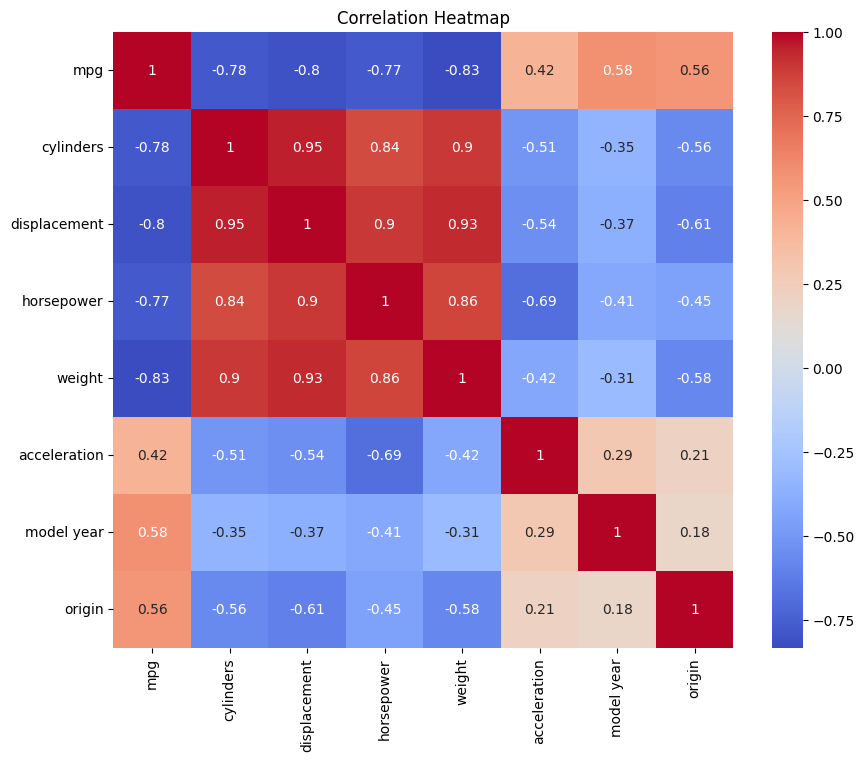

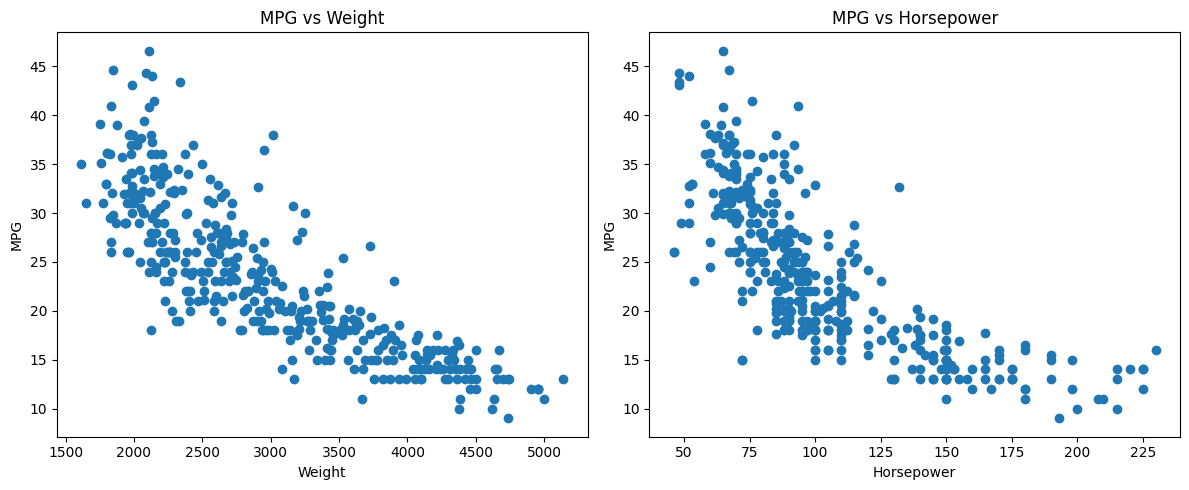


Unique values in 'origin': [1 3 2]

Cleaned dataset preview:
     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name  car name code  
0          70       1  chevrolet chevelle malibu             49  
1          70       1          buick skylark 320             36  
2          70       1         plymouth satellite            231  
3          70       1              amc rebel sst             14  
4          70       1                ford torino            161  


In [26]:
# Step 0: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
# Make sure the CSV file is in your Colab folder or local Jupyter directory
df = pd.read_csv("auto-mpg.csv")

# Step 1a: Display the first few rows
print("First 5 rows of the dataset:\n", df.head())

# Step 1b: Check dataset info and types
print("\nDataset info:\n")
print(df.info())

# Step 2: Identify missing values
# This helps us know if we need to clean the data
missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values)

# Step 3: Convert 'horsepower' to numeric (sometimes it contains '?')
# Errors='coerce' will convert non-numeric entries to NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Step 3a: Fill or drop missing values if needed
# Here we fill missing horsepower values with the median
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

# Step 4: Estimate skewness and kurtosis (numeric columns only)
numeric_cols = df.select_dtypes(include=[np.number])  # select numeric columns only
skewness = numeric_cols.skew()
kurtosis = numeric_cols.kurt()

print("\nSkewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

# Step 5: Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 6: Scatter plots for some parameters
plt.figure(figsize=(12,5))

# mpg vs weight
plt.subplot(1,2,1)
plt.scatter(df['weight'], df['mpg'])
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.title("MPG vs Weight")

# horsepower vs mpg
plt.subplot(1,2,2)
plt.scatter(df['horsepower'], df['mpg'])
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("MPG vs Horsepower")

plt.tight_layout()
plt.show()

# Step 7: Replace categorical values with numeric values
# 'origin': America=1, Europe=2, Asia=3
# Usually already numeric in dataset, but check
print("\nUnique values in 'origin':", df['origin'].unique())

# If needed, convert car names to category codes (optional)
df['car name code'] = df['car name'].astype('category').cat.codes

# Step 8: Display final cleaned dataset head
print("\nCleaned dataset preview:\n", df.head())
